In [1]:
#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [2]:
###IMPORTAR LIBRERÍAS
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Preparación, modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn import set_config
import multiprocessing

In [3]:
##IMPORTAR DATOS
datos = pd.read_csv('risk_german_bank.csv')
datos.head()

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,4,53,male,2,free,little,little,4870,24,car,1


In [4]:
datos.drop('Unnamed: 0.1', axis = 1, inplace = True)
datos.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1


In [5]:
##EXPLORACIÓN DE DATOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [7]:
datos.describe()

,Unnamed: 0,Age,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,3271.258000,20.903000,0.229000
std,288.819436,11.375469,2822.736876,12.058814,0.420399
min,0.000000,19.000000,250.000000,4.000000,0.000000
25%,249.750000,27.000000,1365.500000,12.000000,0.000000
50%,499.500000,33.000000,2319.500000,18.000000,0.000000
75%,749.250000,42.000000,3972.250000,24.000000,0.000000
max,999.000000,75.000000,18424.000000,72.000000,1.000000


In [8]:
datos.Job = datos.Job.astype('str')

In [10]:
datos.describe()

,Unnamed: 0,Age,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,3271.258000,20.903000,0.229000
std,288.819436,11.375469,2822.736876,12.058814,0.420399
min,0.000000,19.000000,250.000000,4.000000,0.000000
25%,249.750000,27.000000,1365.500000,12.000000,0.000000
50%,499.500000,33.000000,2319.500000,18.000000,0.000000
75%,749.250000,42.000000,3972.250000,24.000000,0.000000
max,999.000000,75.000000,18424.000000,72.000000,1.000000


In [9]:
X = datos.drop('Risk', axis = 1)
y = datos['Risk']

In [10]:
X.describe()

,Unnamed: 0,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,3271.258000,20.903000
std,288.819436,11.375469,2822.736876,12.058814
min,0.000000,19.000000,250.000000,4.000000
25%,249.750000,27.000000,1365.500000,12.000000
50%,499.500000,33.000000,2319.500000,18.000000
75%,749.250000,42.000000,3972.250000,24.000000
max,999.000000,75.000000,18424.000000,72.000000


In [11]:
X.describe(include = 'object')

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,817,606,1000
unique,2,4,3,4,3,8
top,male,2,own,little,little,car
freq,690,630,713,603,274,337


In [12]:
modaSA = datos['Saving accounts'].mode()
modaSA

0    little
dtype: object

In [13]:
modaCA = datos['Checking account'].mode()
modaCA

0    little
dtype: object

In [14]:
X['Saving accounts'].fillna(modaSA[0], inplace = True)
X['Checking account'].fillna(modaCA[0], inplace = True)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   object
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


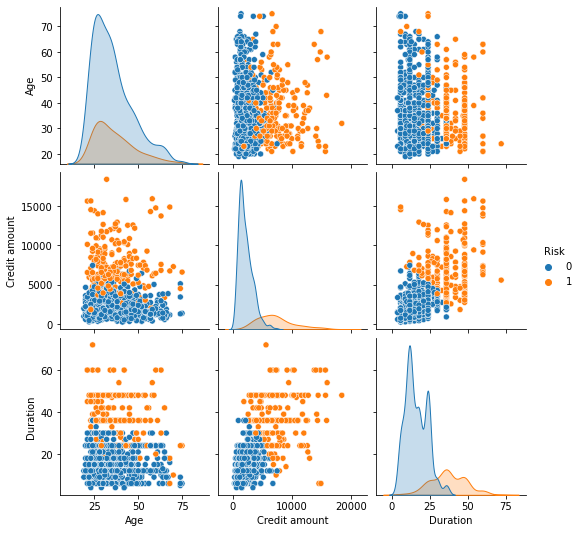

In [16]:
sb.pairplot(data = datos, vars = ['Age','Credit amount','Duration'], hue = 'Risk', kind = 'scatter')
plt.show()

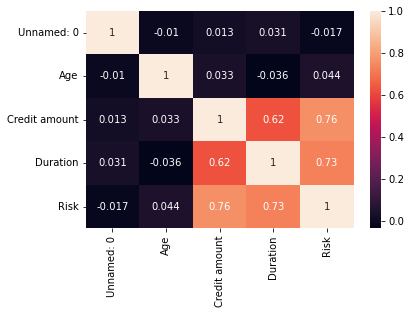

In [17]:
sb.heatmap(datos.corr(), annot = True)
plt.show()

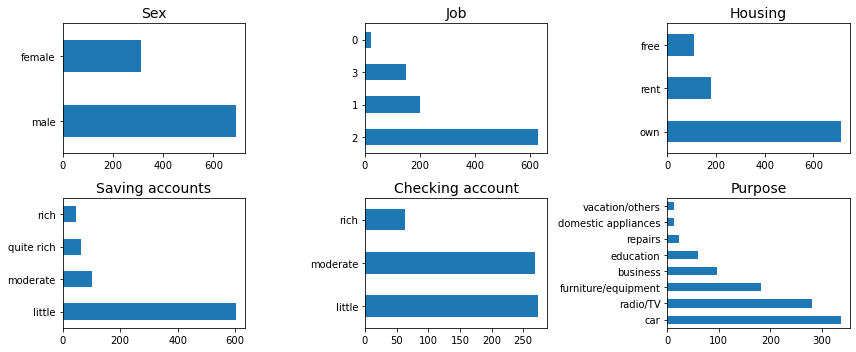

In [18]:
#Gráficos de frecuencia para variables cualitativas
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")
    
fig.tight_layout()

In [19]:
###PREPARACIÓN DE LOS DATOS
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size = 0.7)

In [20]:
numCols = xEntrenamiento.select_dtypes(include=['float64', 'int64']).columns.to_list()
catCols = xEntrenamiento.select_dtypes(include=['object', 'category']).columns.to_list()

numTransformer = Pipeline(steps=[('scaler', StandardScaler())])
catTransformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numTransformer, numCols),
                        ('cat', catTransformer, catCols)
                    ],
                    remainder='passthrough'
                )

set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Unnamed: 0', 'Age', 'Credit amount',
                                  'Duration']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Job', 'Housing', 'Saving accounts',
                                  'Checking account', 'Purpose'])])

In [21]:
xEntrenamientoPre = preprocessor.fit_transform(xEntrenamiento)
xPruebaPre = preprocessor.transform(xPrueba)

In [25]:
codCat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(catCols)
labels = np.concatenate([numCols, codCat])
xEntrenamientoPro = pd.DataFrame(xEntrenamientoPre, columns = labels)
xPruebaPro = pd.DataFrame(xPruebaPre, columns = labels)

xEntrenamientoPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   700 non-null    float64
 1   Age                          700 non-null    float64
 2   Credit amount                700 non-null    float64
 3   Duration                     700 non-null    float64
 4   Sex_female                   700 non-null    float64
 5   Sex_male                     700 non-null    float64
 6   Job_0                        700 non-null    float64
 7   Job_1                        700 non-null    float64
 8   Job_2                        700 non-null    float64
 9   Job_3                        700 non-null    float64
 10  Housing_free                 700 non-null    float64
 11  Housing_own                  700 non-null    float64
 12  Housing_rent                 700 non-null    float64
 13  Saving accounts_litt

In [26]:
xEntrenamientoPro.head()

,Unnamed: 0,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.491246,-0.770026,1.611555,1.224317,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.854257,-0.770026,-0.581308,-0.737954,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.151800,0.041477,-0.559112,-0.492670,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.536229,-0.589692,-0.823379,-0.983238,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.246126,-0.679859,-0.403742,-0.247386,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
###MODELADO
modelo = LogisticRegression()

In [29]:
modelo.fit(xEntrenamientoPro, yEntrenamiento)

LogisticRegression()

In [30]:
modelo.coef_

array([[-0.16518243,  0.35417257,  4.14886549,  3.72319368, -0.15752093,
         0.1574345 , -0.18898831, -0.55452317, -0.16994487,  0.91336991,
         0.5657153 , -0.26034806, -0.30545367,  0.03212568,  0.3342677 ,
        -0.36092078, -0.00555903,  0.17284811,  0.04702365, -0.2199582 ,
         0.02278503,  0.15703788,  0.01206268, -0.07085947, -0.35466956,
        -0.02795158,  0.15938526,  0.10212333]])

In [32]:
predEntrenamiento = modelo.predict(xEntrenamientoPro)

In [46]:
accuracy = accuracy_score(yEntrenamiento, predEntrenamiento)
accuracy

0.9914285714285714

In [47]:
predPrueba = modelo.predict(xPruebaPro)
accuracy = accuracy_score(yPrueba, predPrueba)
accuracy

0.99

## Modelado MLP

In [37]:
from sklearn.neural_network import MLPClassifier